In [4]:
import os
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Data collection and preprossesing 
data0 = pd.read_excel("Dataset/data0.xlsx")
data1 = pd.read_excel("Dataset/data1.xlsx")
data2 = pd.read_excel("Dataset/data2.xlsx")
data3 = pd.read_excel("Dataset/data3.xlsx")
data4 = pd.read_excel("Dataset/data4.xlsx")
data5 = pd.read_excel("Dataset/data5.xlsx")
data6 = pd.read_excel("Dataset/data6.xlsx")
data7 = pd.read_excel("Dataset/data7.xlsx")

In [3]:
data0.head()

,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry
0,2013,19,30,rich class,chuadanga,day Labour,businessman,Forced Marriage,Single,387000,Furniture
1,2014,22,40,rich class,Jashore,businessman,businessman,Irrelevant Marriage,Single,391500,Land
2,2013,16,25,rich class,Jhenaidah,day Labour,Service holder,Forced Marriage,Single,364500,car
3,2014,22,34,higher class,Khulna,businessman,businessman,arrange Marriage,Single,214200,456000
4,2017,18,29,rich class,bagerhat,businessman,Service holder,Forced Marriage,Single,423000,home


In [4]:
#create a function to get all columns from each xlsx file.
def get_column_names(file_path):
    """Helper function to read column names from an Excel file."""
    try:
        df = pd.read_excel(file_path, nrows=0)  # Read only the header (column names)
        return df.columns.tolist()
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

In [5]:
#create a function to compare all columns from each xlsx file.
def check_xlsx_columns(directory):
    """Function to compare column names of all xlsx files in the given directory."""
    column_names = None
    first_file = None
    
    # Loop through all files in the directory
    for file in os.listdir(directory):
        if file.endswith(".xlsx"):
            file_path = os.path.join(directory, file)
            current_columns = get_column_names(file_path)
            
            if current_columns is None:
                return False  # If there was an error reading the file
            
            # If this is the first file, set the column names
            if column_names is None:
                column_names = current_columns
                first_file = file
            else:
                # Compare the current file's columns to the first file's columns
                if column_names != current_columns:
                    print(f"Column mismatch between {first_file} and {file}")
                    return False
    
    return True

In [6]:
directory = r"D:\\ML projects\\Dowry-Data-Bangladesh\\Dataset\\"
result = check_xlsx_columns(directory)
if result:
    print("All files have identical column names.")
else:
    print("Files have different column names.")

All files have identical column names.


In [7]:
def concat_xlsx_files(directory, output_file):
    """Function to concatenate all xlsx files in a directory into one file."""
    dfs = []
    
    # Loop through all files in the directory
    for file in os.listdir(directory):
        if file.endswith(".xlsx"):
            file_path = os.path.join(directory, file)
            
            try:
                # Read the Excel file into a DataFrame
                df = pd.read_excel(file_path)
                dfs.append(df)
                print(f"Loaded {file} successfully.")
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                return False

    # Concatenate all DataFrames
    if dfs:
        final_df = pd.concat(dfs, ignore_index=True)
        
        # Save the concatenated DataFrame to an Excel file
        try:
            final_df.to_excel(output_file, index=False)
            print(f"Successfully saved concatenated file to {output_file}.")
            return True
        except Exception as e:
            print(f"Error saving to {output_file}: {e}")
            return False
    else:
        print("No data to concatenate.")
        return False

In [ ]:
output_file = "Dowry-Data-Bangladesh.xlsx"
concat_xlsx_files(directory, output_file)

In [254]:
data = pd.read_excel("Dowry-Data-Bangladesh.xlsx")

In [255]:
data.head()

,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry
0,2013,19,30,rich class,chuadanga,day labour,businessman,forced marriage,single,387000,furniture
1,2014,22,40,rich class,Jashore,businessman,businessman,irrelevant marriage,single,391500,land
2,2013,16,25,rich class,Jhenaidah,day labour,service holder,forced marriage,single,364500,car
3,2014,22,34,higher class,Khulna,businessman,businessman,arrange marriage,single,214200,456000
4,2017,18,29,rich class,bagerhat,businessman,service holder,forced marriage,single,423000,home


In [256]:
data.shape

(2433, 11)

In [257]:
data.sort_values(by="year",inplace=True,ignore_index=True)

In [258]:
data.head()

,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry
0,2013,20,25,rich class,sylhet,businessman,businessman,forced marriage,single,405000,aurnaments
1,2013,18,38,lower middle class,habiganj,entrepreneur,businessman,irrelevant marriage,single,155400,354600
2,2013,22,37,rich class,mymensingh,businessman,businessman,irrelevant marriage,single,378000,aurnaments
3,2013,19,39,lower middle class,mymensingh,businessman,businessman,irrelevant marriage,single,155400,445800
4,2013,23,31,proverty level,Netrokona,garments worker,driver,arrange marriage,single,44000,410800


In [259]:
data.tail()

,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry
2428,2018,17,31,lower middle class,sunamganj,businessman,service holder,irrelevant marriage,single,360000,694700
2429,2018,18,33,higher middle class,habiganj,garments worker,businessman,irrelevant marriage,single,600000,aurnaments
2430,2018,21,31,higher class,habiganj,day labour,farmer,arrange marriage,single,640000,636600
2431,2018,20,31,proverty level,habiganj,day labour,driver,arrange marriage,single,96000,645800
2432,2018,19,28,higher class,habiganj,businessman,entrepreneur,forced marriage,single,660000,790400


In [260]:
def transform_column(df, col_name, new_col_name):
    """
    This function transforms an existing column by:
    - Creating a new column with numeric values from the original column.
    - Replacing string values with 0 in the new column.
    - Converting numeric values to the string 'MONEY' in the original column.
    
    Parameters:
    - df: DataFrame
    - col_name: Name of the existing column
    - new_col_name: Name of the new column to be created
    
    Returns:
    - DataFrame with the transformed column and new column.
    """
    def extract_numeric(val):
        try:
            return float(val)
        except ValueError:
            return 0  # Replace non-numeric (string) values with 0

    # Create the new column with numeric values or 0 for strings
    df[new_col_name] = df[col_name].apply(extract_numeric)

    # Replace numeric values with 'MONEY' in the original column
    df[col_name] = df[col_name].apply(lambda x: 'money' if str(x).replace('.', '', 1).isdigit() else x)

    return df


In [261]:
#creating new column having money values (NUMERIC) from dowry column
data = transform_column(data,col_name='dowry',new_col_name='dowry_money')

In [262]:
data.tail()

,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry,dowry_money
2428,2018,17,31,lower middle class,sunamganj,businessman,service holder,irrelevant marriage,single,360000,money,694700.0
2429,2018,18,33,higher middle class,habiganj,garments worker,businessman,irrelevant marriage,single,600000,aurnaments,0.0
2430,2018,21,31,higher class,habiganj,day labour,farmer,arrange marriage,single,640000,money,636600.0
2431,2018,20,31,proverty level,habiganj,day labour,driver,arrange marriage,single,96000,money,645800.0
2432,2018,19,28,higher class,habiganj,businessman,entrepreneur,forced marriage,single,660000,money,790400.0


In [263]:
#deleting duplicates values if present.
data.drop_duplicates(inplace=True)

In [264]:
#checking for missing values.
data.isnull().sum()

year                       0
women's age                0
men's age                  0
family type                0
area                       0
girl's job                 0
boy's job                  0
marry condition            0
women married/unmarried    0
mohor                      0
dowry                      0
dowry_money                0
dtype: int64

In [265]:
#stats of data
data.describe()

,year,women's age,men's age,mohor,dowry_money
count,2433.000000,2433.000000,2433.000000,2.433000e+03,2433.000000
mean,2016.050966,20.439786,32.376079,4.362927e+05,264326.715988
std,1.684107,2.463836,4.830128,3.185015e+05,298976.306561
min,2013.000000,16.000000,25.000000,4.000000e+04,0.000000
25%,2015.000000,18.000000,29.000000,2.310000e+05,0.000000
50%,2017.000000,20.000000,32.000000,3.690000e+05,0.000000
75%,2017.000000,22.000000,36.000000,5.500000e+05,558500.000000
max,2018.000000,25.000000,42.000000,1.485000e+06,799700.000000


**women's age-**<br>
    **- Average age of marriage : 20**<br>
    **- Minimum age of marriage : 16**<br>
    **- Maximum age of marriage : 25**<br>

**men's age-**<br>
    **- Average age of marriage : 32**<br>
    **- Minimum age of marriage : 25**<br>
    **- Maximum age of marriage : 42**<br>

In [266]:
#function for checking outliers in columns
def detect_outliers_iqr(df, column):
    """
    Detects outliers in a specified column of a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to check for outliers.
    column (str): The name of the column to check for outliers.
    
    Returns:
    pd.DataFrame: A DataFrame containing only the outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outliers are the values outside the IQR range
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    return outliers


In [267]:
detect_outliers_iqr(data,"women's age")

Lower Bound: 12.0, Upper Bound: 28.0


,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry,dowry_money


In [268]:
detect_outliers_iqr(data,"men's age")

Lower Bound: 18.5, Upper Bound: 46.5


,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry,dowry_money


In [269]:
detect_outliers_iqr(data,"mohor").shape

Lower Bound: -247500.0, Upper Bound: 1028500.0


(231, 12)

In [270]:
def detect_outliers_zscore(df, column, threshold=3):
    """
    Detects outliers in a specified column of a DataFrame using the Z-score method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to check for outliers.
    column (str): The name of the column to check for outliers.
    threshold (float): The Z-score threshold to consider an outlier (default is 3).
    
    Returns:
    pd.DataFrame: A DataFrame containing only the outliers.
    """
    mean_col = df[column].mean()
    std_col = df[column].std()
    
    # Calculate the Z-scores
    df['Z_score'] = (df[column] - mean_col) / std_col
    
    # Outliers are values with Z-scores greater than the threshold (absolute value)
    outliers = df[np.abs(df['Z_score']) > threshold]
    
    return outliers


In [271]:
detect_outliers_zscore(data,"women's age")

,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry,dowry_money,Z_score


In [272]:
detect_outliers_zscore(data,"men's age")

,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry,dowry_money,Z_score


In [273]:
detect_outliers_zscore(data,"mohor").shape

(33, 13)

**The Interquartile Range (IQR) method is often better than the Z-score method for identifying outliers in skewed or non-normal data**
### **IQR method-**
**This method is more robust and less affected by extreme values, making it a better choice for identifying outliers in skewed distributions. It's also simple to calculate and the data spread is easy to interpret. However, it can only handle univariate data, and it can remove valid data points if the data is skewed or has heavy tails.** 
### **Z-score method-**
**This method is useful when data closely follow a normal distribution. It can be used to identify outliers, understand where an individual score fits into a distribution, and normalize scores for statistical decision-making. However, it can be sensitive to skewness and misidentify points as outliers. It can also have drawbacks when used for predictive modeling, such as losing the original meaning and scale of the data.**
**A Z-score is a standard score, which is the number of standard deviations by which a raw score is above or below the mean.**

In [274]:
def check_for_skew(data,column):
    skew_score = data[column].skew()
    if skew_score > 0:
        print("The distribution has a longer or fatter tail on the right side.(Positive skew)")
    else:
        print("The distribution has a longer or fatter tail on the left side.(Negative skew)")

In [275]:
check_for_skew(data,"mohor")

The distribution has a longer or fatter tail on the right side.(Positive skew)


**In the case of a positively skewed distribution, IQR tends to perform better.**

<Axes: xlabel='mohor'>

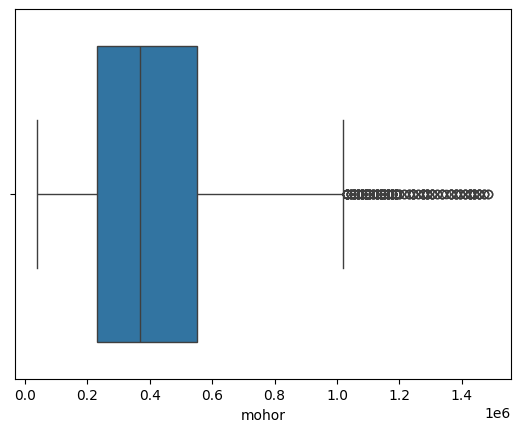

In [276]:
#box plot for checking outliers
sns.boxplot(data,x='mohor',)

In [277]:
def reduce_skewness(data,column):
    data[column], _ = stats.boxcox(data[column])

In [278]:
reduce_skewness(data,'mohor')

In [279]:
print("Total rows having outliers : ",detect_outliers_iqr(data,'mohor').shape)

Lower Bound: 28.422532594144712, Upper Bound: 54.639072763210294
Total rows having outliers :  (35, 13)


**Now only 35 rows (outliers) are remaining out of 2433 rows, so we can remove them.**

In [280]:
#removing 35 rows 
Q1 = data["mohor"].quantile(0.25)
Q3 = data["mohor"].quantile(0.75)
IQR = Q3 - Q1
            
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data["mohor"] >= lower_bound) & (data["mohor"] <= upper_bound)]

In [281]:
print("Total rows having outliers : ",detect_outliers_iqr(data,'mohor').shape)
print("Value of skewness : ",data["mohor"].skew())
check_for_skew(data,"mohor")

Lower Bound: 28.20369557288055, Upper Bound: 55.00380113198389
Total rows having outliers :  (0, 13)
Value of skewness :  0.12461185492524458
The distribution has a longer or fatter tail on the right side.(Positive skew)


<Axes: xlabel='mohor', ylabel='Density'>

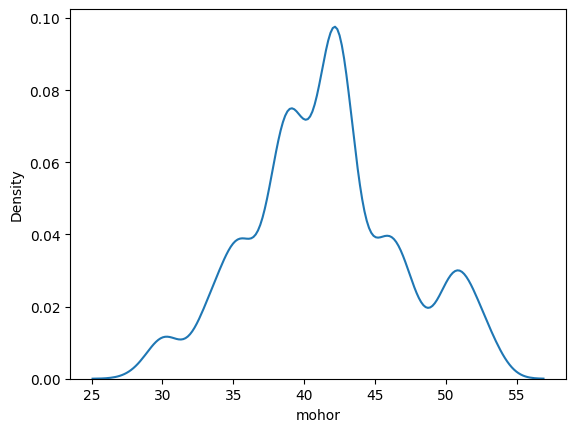

In [282]:
sns.kdeplot(data,x="mohor",)

**Now column is noramlly distributed.**

In [283]:
data.drop(columns='Z_score',inplace=True)

In [284]:
data.head()

,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry,dowry_money
0,2013,20,25,rich class,sylhet,businessman,businessman,forced marriage,single,42.392454,aurnaments,0.0
1,2013,18,38,lower middle class,habiganj,entrepreneur,businessman,irrelevant marriage,single,35.545238,money,354600.0
2,2013,22,37,rich class,mymensingh,businessman,businessman,irrelevant marriage,single,41.863870,aurnaments,0.0
3,2013,19,39,lower middle class,mymensingh,businessman,businessman,irrelevant marriage,single,35.545238,money,445800.0
5,2013,23,26,higher class,Jamalpur,lower service holder,service holder,love marriage,single,38.124582,money,363700.0


In [285]:
def countplot(data,column):
    bar = sns.countplot(data=data,x=column,palette='rocket')
    for bars in bar.containers:
        bar.bar_label(bars)
    plt.tight_layout()

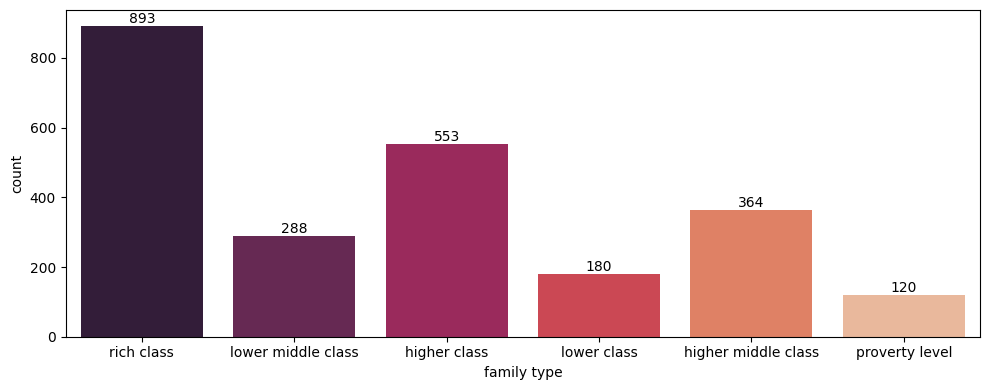

In [286]:
plt.figure(figsize=(10,4))
countplot(data,"family type")

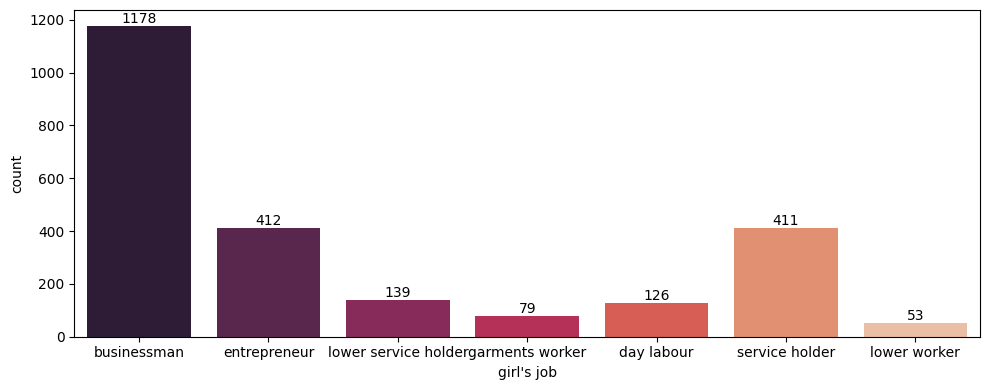

In [287]:
plt.figure(figsize=(10,4))
countplot(data,"girl's job")

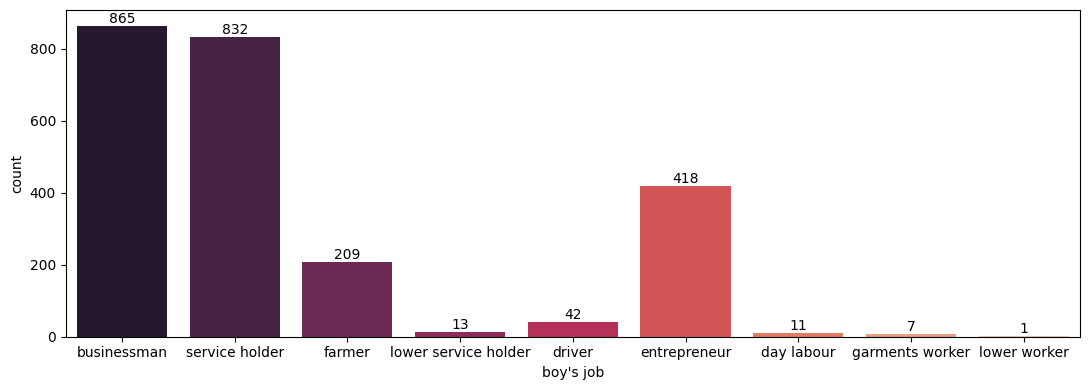

In [288]:
plt.figure(figsize=(11,4))
countplot(data,"boy's job")

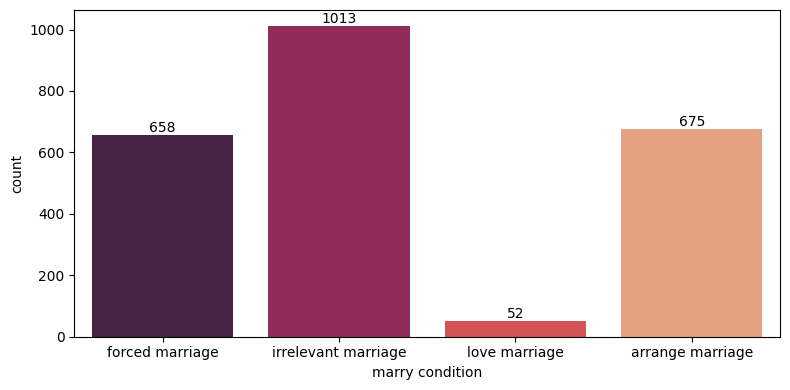

In [289]:
plt.figure(figsize=(8,4))
countplot(data,'marry condition')

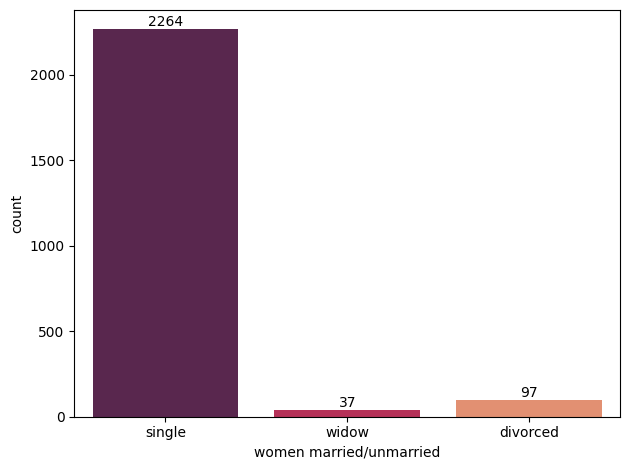

In [290]:
countplot(data,'women married/unmarried')

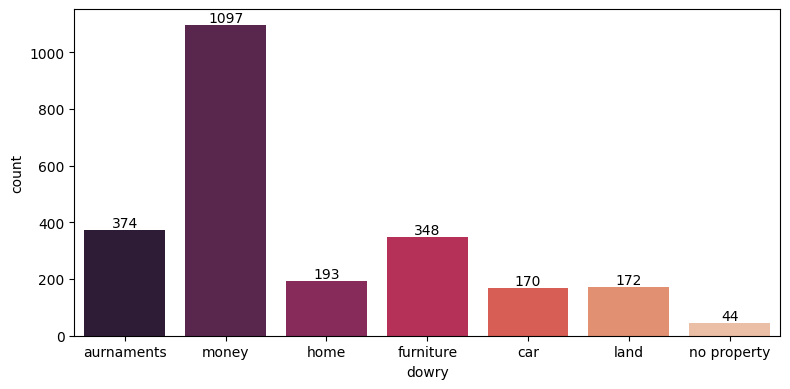

In [291]:
plt.figure(figsize=(8,4))
countplot(data,'dowry')

### **Machine learning Model :**

In [344]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from category_encoders import BinaryEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


In [345]:
X = data.drop(columns=['dowry','dowry_money'])
y_dowry_money = data['dowry_money']
y_dowry = data['dowry']

In [346]:
X_train, X_test, y_dowry_money_train, y_dowry_money_test, y_dowry_train, y_dowry_test = train_test_split(
    X, y_dowry_money, y_dowry, test_size=0.2, stratify=y_dowry,random_state=42)

In [347]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2398 entries, 0 to 2432
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     2398 non-null   int64  
 1   women's age              2398 non-null   int64  
 2   men's age                2398 non-null   int64  
 3   family type              2398 non-null   object 
 4   area                     2398 non-null   object 
 5   girl's job               2398 non-null   object 
 6   boy's job                2398 non-null   object 
 7   marry condition          2398 non-null   object 
 8   women married/unmarried  2398 non-null   object 
 9   mohor                    2398 non-null   float64
 10  dowry                    2398 non-null   object 
 11  dowry_money              2398 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 243.5+ KB


In [348]:
numerical_features = X_train.select_dtypes(['int64','float64'])
categorical_features = X_train.select_dtypes('object')

In [366]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [367]:
# numerical_transformer = Pipeline([
#     'reduce_skewness',FunctionTransformer(reduce_skewness,validate=True)
# ])

In [368]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardizes the features
])

In [373]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['year', "women's age", "men's age", 'mohor']),
        ('cat', categorical_transformer, ['family type', 'area', "girl's job", "boy's job", 'marry condition', 'women married/unmarried'])
    ]
)

In [374]:
categorical_features

,family type,area,girl's job,boy's job,marry condition,women married/unmarried
2132,rich class,Kurigram,businessman,service holder,forced marriage,single
869,higher class,naogaon,businessman,service holder,irrelevant marriage,single
767,rich class,Shariatpur,businessman,businessman,forced marriage,single
954,higher class,Kurigram,businessman,farmer,arrange marriage,single
634,rich class,Tangail,businessman,service holder,irrelevant marriage,single
...,...,...,...,...,...,...
1102,higher class,Netrokona,businessman,service holder,forced marriage,single
2177,rich class,pabna,businessman,businessman,forced marriage,single
2112,higher class,sirajganj,entrepreneur,businessman,irrelevant marriage,single
227,higher class,Chattogram,businessman,farmer,irrelevant marriage,single


In [383]:
def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['SVM', 'RandomForest', 'GradientBoosting'])

    if classifier_name == 'SVM':
        c = trial.suggest_float('C', 0.1, 100, log=True)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
        degree = trial.suggest_int('degree', 1, 100)
        coef0 = trial.suggest_float('coef0', 0.0, 10)
        max_iter = trial.suggest_int('max_iter', -1, 100)
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

        model = SVC(C=c, kernel=kernel, degree=degree, gamma=gamma, coef0=coef0, max_iter=max_iter, random_state=42)

    elif classifier_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
        oob_score = trial.suggest_categorical('oob_score', [True, False])
        max_depth = trial.suggest_int('max_depth', 3, 100)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)
        n_jobs = trial.suggest_int('n_jobs', -1, 1, 100)

        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            random_state=42,
            oob_score=oob_score,
            n_jobs=n_jobs
        )

    elif classifier_name == 'GradientBoosting':
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        max_depth = trial.suggest_int('max_depth', 3, 100)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)
        subsample = trial.suggest_float('subsample', 0.0, 1.0)
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
        criterion = trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error'])
        # n_iter_no_change = trial.suggest_int('n_iter_no_change', 1, 100)

        model = GradientBoostingClassifier(
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            subsample=subsample,
            criterion=criterion,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_depth=max_depth,
            # n_iter_no_change=n_iter_no_change,
            random_state=42
        )

    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),   # Ensure this step is correctly defined
        ('classifier', model)
    ])

    # Use error_score='raise' to debug errors during cross-validation
    try:
        score = cross_val_score(model_pipeline, X_train, y_dowry_train, cv=3, scoring='accuracy', error_score='raise').mean()
    except ValueError as e:
        print(f"Error during cross-validation: {e}")
        raise  # Re-raise the error for debugging purposes

    return score


In [ ]:
# Create a study and optimize it using CmaEsSampler
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

In [ ]:
# Retrieve the best trial
best_trial = study.best_trial
print("Best trial parameters:", best_trial.params)
print("Best trial accuracy:", best_trial.value)

In [ ]:
study.trials_dataframe()['params_classifier'].value_counts()